In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Print out the classification report and confusion matrix
def metrics(y_pred, y_test):
    
    #print classification report
    print(classification_report(y_test, y_pred,target_names=tags))

    #Create confusion matrix
    confuse = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(confuse, annot=True, cmap='Blues', 
                fmt='d', xticklabels=tags, yticklabels=tags)
    
    #Add labels to confusion matrix and print
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

In [3]:
#run the specific model
def models(model_type):
    
    model= int(model_type)
    
    #if Forest make classifer such    
    if model == 1:
        clf=RandomForestClassifier()
    
    #if Naive make classifer such
    elif model == 2:
        clf = MultinomialNB()
        
    #if SVM make classifer such   
    elif model == 3:
        clf = svm.SVC(kernel='linear')
    
    #Train classifer on training data
    clf.fit(X_train, y_train)
    
    #Store predicition data 
    y_pred = clf.predict(X_test)    
    y_full = clf.predict(X)
    
    #Return predicition data
    return (y_pred, y_full)



In [4]:
#preprocess the text
def preprocess(step):
    
    #Creates step as an integer
    step = int(step)

    #if step is greater than 0, drop name
    if step >=0:  
        df.drop(['name'], axis=1, inplace = True)
    
    #if step is greater than 1, drop mult
    if step >= 1:
        df.drop(['mult'], axis=1, inplace = True)
    
    #if step is greater than 2, drop group
    if step >=2:
        df.drop(['group'], axis=1, inplace = True)
    
    #if step is greater than 3, drop wall_motion_score
    if step >=3:
         df.drop(['wall_motion_score'], axis=1, inplace = True)
    
    #if step is greater than 4, drop alive_at_1
    if step >=4:
        df.drop(['alive_at_1'], axis=1, inplace = True)

In [5]:
def testsize(size,X,y):
    
    #creates test a integer
    test = int(size)
    
    #if test 1, 10/90 split
    if test == 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state = 42)

    #if test 2, 25/75 split
    elif test == 2:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 42)

    #if test 3, 50/50 split    
    elif test == 3:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50, random_state = 42)
    
    #if test 4, 75/25 split
    elif test == 4:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.75, random_state = 42)
    
    #if test 5, 90/10 split
    elif test == 5:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.90, random_state = 42)
    
    #return the test and training sets      
    return (X_train, X_test, y_train, y_test)

In [6]:
#read the csv data set file
df = pd.read_csv('D:\Desktop\Project\echocardiogram2.data')

#Fill unimportant null data with 0
df['mult'].fillna(0,inplace=True)
df['wall_motion_score'].fillna(0,inplace=True)
df['group'].fillna(0,inplace=True)
df['alive_at_1'].fillna(0,inplace=True)

#Sets tags for representation
tags= ['Dead','Alive']

df.head(10)

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.000,1.000,name,1.0,0.0
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.700,0.588,name,1.0,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.000,1.000,name,1.0,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.450,0.788,name,1.0,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.250,0.571,name,1.0,0.0
5,26.0,0,68.0,0,0.260,5.000,4.310,12.0,1.000,0.857,name,1.0,0.0
6,13.0,0,62.0,0,0.230,31.000,5.430,22.5,1.875,0.857,name,1.0,0.0
7,50.0,0,60.0,0,0.330,8.000,5.250,14.0,1.000,1.000,name,1.0,0.0
8,19.0,0,46.0,0,0.340,0.000,5.090,16.0,1.140,1.003,name,1.0,0.0
9,25.0,0,54.0,0,0.140,13.000,4.490,15.5,1.190,0.930,name,1.0,0.0


In [7]:
#Recieves users input and goes through correlating pre-processing
inp=input("Preprocessing Step(0-4)? ")
preprocess(inp)

#Drops null values
df.dropna(axis=0, inplace=True)

#Seperates class from other attributes 
X = df.drop("still_alive", axis=1)
y = df.still_alive

#Recieves users input and goes through correlating test/training ratio
inp2=input("Test size (1-5)? ")
X_train, X_test, y_train, y_test = testsize(inp2,X,y)

Preprocessing Step(0-4)? 1
Test size (1-5)? 1


In [8]:
##Recieves users input and goes through correlating classifier
model=input("Which Classifier (1: Forest, 2: Naive, 3: SVM)")
y_pred, y_full = models(model)

df.head(10)

Which Classifier (1: Forest, 2: Naive, 3: SVM)1
Results for classifier 1 and Preprocessing Step 1


,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,group,alive_at_1
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.000,1.0,0.0
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.700,1.0,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.000,1.0,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.450,1.0,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.250,1.0,0.0
5,26.0,0,68.0,0,0.260,5.000,4.310,12.0,1.000,1.0,0.0
6,13.0,0,62.0,0,0.230,31.000,5.430,22.5,1.875,1.0,0.0
7,50.0,0,60.0,0,0.330,8.000,5.250,14.0,1.000,1.0,0.0
8,19.0,0,46.0,0,0.340,0.000,5.090,16.0,1.140,1.0,0.0
9,25.0,0,54.0,0,0.140,13.000,4.490,15.5,1.190,1.0,0.0


              precision    recall  f1-score   support

        Dead       1.00      0.60      0.75        10
       Alive       0.20      1.00      0.33         1

    accuracy                           0.64        11
   macro avg       0.60      0.80      0.54        11
weighted avg       0.93      0.64      0.71        11



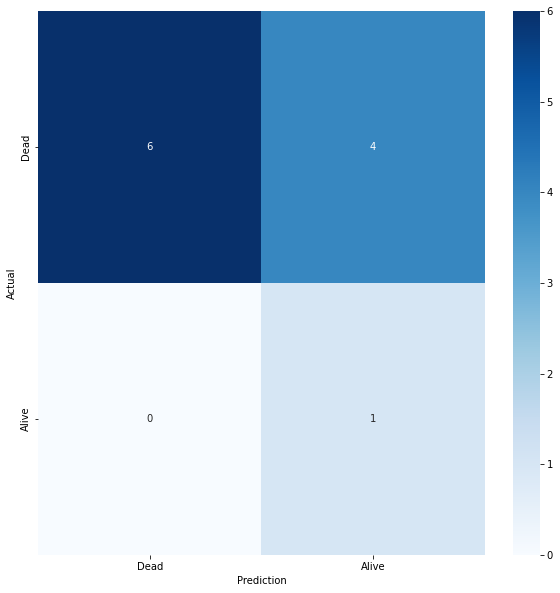

In [9]:
#Shows accuracy and confusion matrix
metrics(y_test,y_pred)

In [10]:
#Calculating AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr)

0.6